# Monotonicity theorem

A function is called monotonically increasing (also increasing or non-decreasing) if for all $x$ and $y$ such that ${x\leq y}$ one has ${f\left(x\right)\leq f\left(y\right)}$.

We can use this principle to infer constraint activity.

## example of active constraints

Recall the 2-variable beam design problem

\begin{equation*}
	\begin{aligned}
		& \underset{\mathbf{x}}{\text{minimize}}
		& & f(\mathbf{{x};{\mathbf{p}}}) = W({h},{b};{L},{\rho}) = \rho bhL\\
		& \text{subject to}
		& & g(\mathbf{{x};{\mathbf{p}}}) = \sigma_\text{max}({h},{b};{L},{P},\sigma_y) = \dfrac{6PL}{bh^2} - {{\sigma_y}} \le 0\\
	\end{aligned}
\end{equation*}

performing a monotonicity anaylsis:

\begin{equation*}
	\begin{aligned}
		& \underset{\mathbf{x}}{\text{minimize}}
		& & f({h^+},{b^+};{L},{\rho})\\
		& \text{subject to}
		& & g({h^-},{b^-};{L},{P}) \le 0\\
	\end{aligned}
\end{equation*}

We can see that every monotonic variable in the objective is bounded by at least one constraint function with the opposite monotonocity. Therefore, $g(\mathbf{x})$ is *active*.


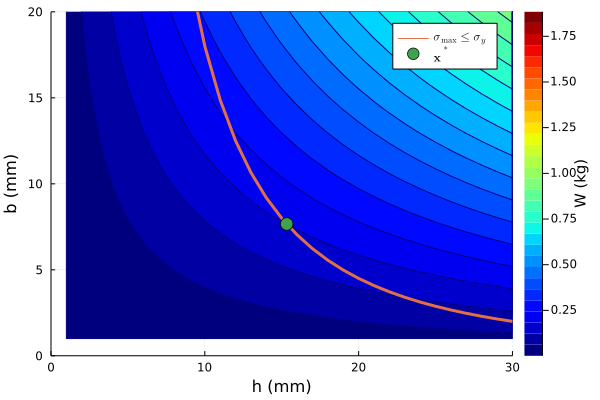

In [1]:
using Plots,LaTeXStrings

# independent parameters
h_2D = LinRange(1,30,30) # mm
b_2D = LinRange(1,40,30) # mm

# Parameters
ρ = 7.85e-6 #kg/mm3
P = 300 # N
L = 200 # mm
σ_y = 200 # MPa

# dependant variables
σ_max(h,b) = (6*P*L) / (b*h^2)
W(h,b) = ρ*b*h*L

# constraint function
b_cstr(h) = (6*P*L) / (σ_y*h^2)

# optimal variables
b_opt(σ_y) = (σ_y^3*((18*L^5*P^2*ρ^3)/σ_y^5)^(2/3))/(6*L^3*P*ρ^2)
h_opt(σ_y) = (σ_y^3*((18*L^5*P^2*ρ^3)/σ_y^5)^(2/3))/(3*L^3*P*ρ^2)
λ(σ_y) = ((18*L^5*P^2*ρ^3)/σ_y^5)^(1/3)

# Weight plot
p1 = contour(h_2D, b_2D, W, fill = true, levels = 30,  c = :jet1, colorbar_title="W (kg)")
plot!(h_2D, b_cstr, lw = 3, label=L"\sigma_{\mathrm{max}} \leq \sigma_{y}")
scatter!([h_opt(σ_y)], [b_opt(σ_y)], markersize = 7, label=L"\mathbf{x}^*")
xlabel!("h (mm)")
ylabel!("b (mm)")
ylims!((0,20))
xlims!((0,30))
# savefig(p1,"active_constraint.pdf")

## Example of interior optima (inactive constraints)

Consider the following optimization problem

\begin{equation*}
	\begin{aligned}
		& \underset{x_1,x_2}{\text{minimize}}
		& & f(x_1,x_2) = \sqrt{\left(x_1-1\right)^2 + \left(x_2-1\right)^2}\\
		& \text{subject to}
		& & g(x_1,x_2;a) = \dfrac{1}{ax_1x_2} - 1 \le 0\\
	\end{aligned}
\end{equation*}

performing a monotonicity anaylsis on $g(x_1,x_2;a)$ is possible. However, $f(x_1,x_2)$ is not monotonic with respect to $x_1$ or $x_2$

\begin{equation*}
	\begin{aligned}
		& \underset{\mathbf{x}}{\text{minimize}}
		& & f({x_1^?},{x_2^?})\\
		& \text{subject to}
		& & g({x_1^-},{x_2^-};a) \le 0\\
	\end{aligned}
\end{equation*}

The activity of the constraint depends on the value of the constraint parameter $a$

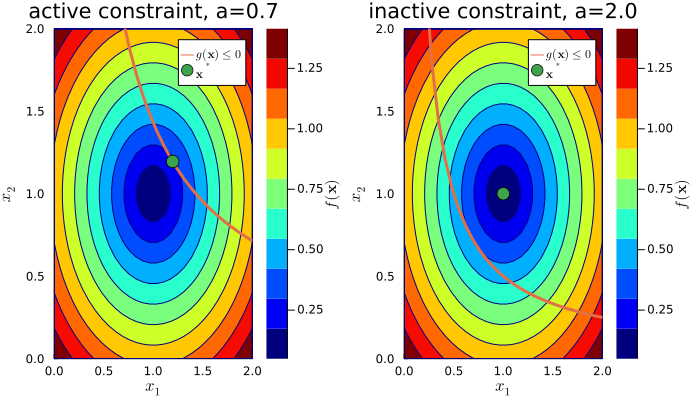

In [2]:
# independent parameters
x1 = LinRange(0,2,30)
x2 = LinRange(0,2,30)

# dependant variables
f(x1,x2) = sqrt((x1-1)^2 + (x2-1)^2)
g(x1,x2) = 1/(a*x1*x2) - 1

# constraint function
y_cstr(x1) = 1/(a*x1)

# optimal variables
μ(a) = - sqrt(2) * abs(sqrt(a) - 1) / 2* (a - sqrt(a))
x1_opt(a) = if μ(a) > 0 sqrt(a) / a else 1 end
x2_opt(a) = if μ(a) > 0 sqrt(a) / a else 1 end

# active constraint
a = 0.7
p1 = contour(x1, x2, f, fill = true,  levels = 10, title="active constraint, a=$a", c = :jet1, colorbar_title=L"f(\mathbf{x})")
plot!(x1, y_cstr, lw = 3, label=L"g(\mathbf{x}) \leq 0")
scatter!([x1_opt(a)], [x2_opt(a)], markersize = 7, label=L"\mathbf{x}^*")
xlabel!(L"x_1")
ylabel!(L"x_2")
ylims!((0,2))
xlims!((0,2))
savefig(p1,"active_constraint.pdf")

# inactive constraint (interior optimum)
a = 2.0
p2 = contour(x1, x2, f, fill = true,  levels = 10, title="inactive constraint, a=$a", c = :jet1, colorbar_title=L"f(\mathbf{x})")
plot!(x1, y_cstr, lw = 3, label=L"g(\mathbf{x}) \leq 0")
scatter!([x1_opt(a)], [x2_opt(a)], markersize = 7, label=L"\mathbf{x}^*")
xlabel!(L"x_1")
ylabel!(L"x_2")
ylims!((0,2))
xlims!((0,2))
savefig(p2,"inactive_constraint.pdf")

# combined plot
plot(p1, p2, size = (700, 400), layout = grid(1, 2, widths=[0.5 ,0.5]))